In [89]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.3f}'.format

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import stats

import statsmodels.api as sm

In [90]:
def compute_ks(y_test, y_pred_test):
    return stats.ks_2samp(y_pred_test[y_test == 1.0],y_pred_test[y_test == 0.0])[0]

## 1. Load Data

In [116]:
df = pd.read_csv("../data/interim/out6.csv")

In [117]:
df.count()

ClientId                        599238
EVER60                          599238
M0                              599238
VALUE_ACCOUNT_CREDIT_INFLOW     599238
VALUE_NOT_CATEGORIZED_INFLOW    599238
                                 ...  
Renda                           599238
SALDO_CRED_DISP_M_4             599238
SALDO_CRED_DISP_M_3             599238
SALDO_CRED_DISP_M_2             599238
SALDO_CRED_DISP_M_1             599238
Length: 68, dtype: int64

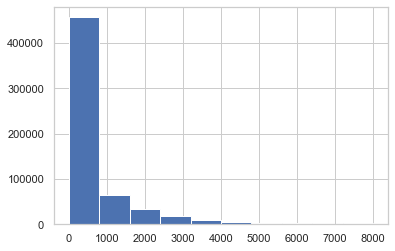

In [118]:
df['VALUE_PRODUCT_CREDIT_CARD_OUTFLOW'].hist()

In [119]:
df.count()

ClientId                        599238
EVER60                          599238
M0                              599238
VALUE_ACCOUNT_CREDIT_INFLOW     599238
VALUE_NOT_CATEGORIZED_INFLOW    599238
                                 ...  
Renda                           599238
SALDO_CRED_DISP_M_4             599238
SALDO_CRED_DISP_M_3             599238
SALDO_CRED_DISP_M_2             599238
SALDO_CRED_DISP_M_1             599238
Length: 68, dtype: int64

#### Setembro: para validacao

In [120]:
df['M0'] = pd.to_datetime(df['M0'])

In [121]:
df_validacao = df[df['M0']>='2019-09-01'].copy()
df = df[df['M0']<='2019-08-31']

In [122]:
df_validacao['M0'].max()

Timestamp('2019-09-27 00:00:00')

#### Quantidade de Clientes

In [123]:
df['ClientId'].count()

445293

#### Ajustes

In [124]:
df_ref = df[['EVER60', 'ClientId', 'M0']]
df_ref_val = df_validacao[['EVER60', 'ClientId', 'M0']]

df['target'] = df['EVER60']
df_validacao['target'] = df_validacao['EVER60']

df.drop(columns = [ 'M0', 'EVER60'], inplace = True)
df_validacao.drop(columns = [ 'M0', 'EVER60'], inplace = True)

#### Inbalanced Data

In [125]:
df['target'].value_counts()

0    384120
1     61173
Name: target, dtype: int64

## 2. Train, Test Split

In [126]:
len(df.columns)

67

In [105]:
df.head()

ClientId  VALUE_ACCOUNT_CREDIT_INFLOW  VALUE_NOT_CATEGORIZED_INFLOW  \
0   1022285                       25.000                         0.000   
1   1573997                        0.000                         0.000   
2    152251                    1,450.000                         0.000   
3   1245851                        0.000                       189.470   
4    638762                    3,469.190                         0.000   

   VALUE_INVOICE_PAYMENT_INFLOW  VALUE_INSTALLMENT_PAYMENT_INFLOW  \
0                     3,441.470                             0.000   
1                         0.000                             0.000   
2                     1,120.580                           900.800   
3                       345.260                             0.000   
4                       741.120                         4,614.000   

   VALUE_GIFTS_INFLOW  VALUE_RECEIPTS_INFLOW  \
0              15.000                  0.000   
1               0.000                  0.000   
2               0.000                  0.000   
3               0.000                  0.000   
4               0.000              1,035.900   

   VALUE_SUBSCRIPTIONS_SERVICES_OUTFLOW  VALUE_BARS_RESTAURANTS_OUTFLOW  \
0                                57.000                         694.890   
1                                 0.000                           0.000   
2                               187.590                         546.900   
3                                91.800                          73.000   
4                               183.170                          15.880   

   VALUE_PERSONAL_CARE_OUTFLOW  ...  FlagEmployee  PossuiVeiculo  \
0                        0.000  ...             0              0   
1                       25.000  ...             0              0   
2                      203.800  ...             0              0   
3                       52.860  ...             0              0   
4                        0.000  ...             0              0   

   DeclaredIncome  StartDepositValue     Renda  SALDO_CRED_DISP_M_4  \
0      20,000.000             10.000 6,849.680                0.000   
1       2,000.000             10.000   712.140                0.000   
2           0.000              0.000     0.000                0.000   
3       2,500.000             10.000 1,007.920                0.000   
4           0.000              0.000     0.000            1,045.280   

   SALDO_CRED_DISP_M_3  SALDO_CRED_DISP_M_2  SALDO_CRED_DISP_M_1  target  
0                0.000            7,010.610            3,665.220       0  
1                0.000                0.000                0.000       0  
2            1,118.120              845.680            1,987.580       0  
3                0.000              245.220              133.930       0  
4              872.270              761.460              634.550       0  

[5 rows x 67 columns]

In [137]:
df1 = df[(df != 0).sum(axis = 1) > 10].copy()
df2 = df[~df['ClientId'].isin(df1['ClientId'])].copy()
print(df1['ClientId'].count()/df['ClientId'].count(),  df2['ClientId'].count()/df['ClientId'].count())

0.8003179928721089 0.07887840141210394


### Segmentacao 1

In [107]:
X = df2.drop(columns = ['target']).copy()
X_ids = df2[['ClientId']]
y = df2['target'].copy()
# y = pd.DataFrame(data = df.target)

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3, random_state=0, shuffle = True)

# K1=X_train.drop(columns = ['ClientId']).copy()
# X_train = X_train.loc[~(K1==0).all(axis=1)]
# y_train = y_train.loc[~(K1==0).all(axis=1)]

X_val = df_validacao.drop(columns = ['target']).copy()
X_val.ids = df_validacao[['ClientId']]
y_val = df_validacao['target'].copy()

In [108]:
print(X_test.shape)

y_test = y_test.loc[~X_test.ClientId.isin(X_train.ClientId)]
X_test = X_test.loc[~X_test.ClientId.isin(X_train.ClientId)]

y_val = y_val.loc[~X_val.ClientId.isin(X_train.ClientId)]
X_val = X_val.loc[~X_val.ClientId.isin(X_train.ClientId)]

test_ids = X_test[['ClientId']]

print(X_test.shape, y_test.shape)

X_test.drop(columns = 'ClientId', inplace = True)
X_train.drop(columns = 'ClientId', inplace = True)
X_val.drop(columns = 'ClientId', inplace = True)

X_ids.loc[X_train.index, :].shape

# X1_ids.loc[y1_test.index, :].index

len(X_train), len(X_test), len(X_val)

(15036, 66)
(5334, 66) (5334,)


(35083, 5334, 133045)

In [109]:
## 3. Train Model

# sklearn

model = LogisticRegression(C=15, random_state=0, class_weight='balanced', penalty='l1')
mdl = model.fit(X_train, y_train)
print(mdl)

LogisticRegression(C=15, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [110]:
y_test_pred= model.predict(X_test)
y_test_pred_proba= model.predict_proba(X_test)[:, 1] 

acc = accuracy_score(y_test, y_test_pred)

sample0_a = y_test_pred[y_test == 0]
sample_a = y_test_pred[y_test == 1 ]

print("Accuracy-test is %s"%(acc))
print("KS-test is:", stats.ks_2samp(sample0_a, sample_a))

y_train_pred= model.predict(X_train)
y_train_pred_proba= model.predict_proba(X_train)[:, 1] 

acc_train = accuracy_score(y_train, y_train_pred)

sample0_a_train = y_train_pred[y_train == 0]
sample_a_train = y_train_pred[y_train == 1 ]

print('sklearn:')
print("Accuracy-train is %s"%(acc_train))
print("KS-train is:", stats.ks_2samp(sample0_a_train, sample_a_train))

y_val_pred= model.predict(X_val)
y_val_pred_proba= model.predict_proba(X_val)[:, 1] 

acc_val = accuracy_score(y_val, y_val_pred)

sample0_a_val = y_val_pred[y_val == 0]
sample_a_val = y_val_pred[y_val == 1 ]

print('sklearn:')
print("Accuracy-val is %s"%(acc_val))
print("KS-val is:", stats.ks_2samp(sample0_a_val, sample_a_val))

Accuracy-test is 0.8085864266966629
KS-test is: Ks_2sampResult(statistic=0.565906216627641, pvalue=1.1875653507448703e-233)
sklearn:
Accuracy-train is 0.8313998232762306
KS-train is: Ks_2sampResult(statistic=0.5990877308339793, pvalue=0.0)
sklearn:
Accuracy-val is 0.7727460633620203
KS-val is: Ks_2sampResult(statistic=0.3873858036185221, pvalue=0.0)


### Segmentacao 2

In [111]:
X = df1.drop(columns = ['target']).copy()
X_ids = df1[['ClientId']]
y = df1['target'].copy()
# y = pd.DataFrame(data = df.target)

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3, random_state=0, shuffle = True)

# K1=X_train.drop(columns = ['ClientId']).copy()
# X_train = X_train.loc[~(K1==0).all(axis=1)]
# y_train = y_train.loc[~(K1==0).all(axis=1)]

X_val = df_validacao.drop(columns = ['target']).copy()
X_val.ids = df_validacao[['ClientId']]
y_val = df_validacao['target'].copy()

In [112]:
print(X_test.shape)

y_test = y_test.loc[~X_test.ClientId.isin(X_train.ClientId)]
X_test = X_test.loc[~X_test.ClientId.isin(X_train.ClientId)]

y_val = y_val.loc[~X_val.ClientId.isin(X_train.ClientId)]
X_val = X_val.loc[~X_val.ClientId.isin(X_train.ClientId)]

test_ids = X_test[['ClientId']]

print(X_test.shape, y_test.shape)

X_test.drop(columns = 'ClientId', inplace = True)
X_train.drop(columns = 'ClientId', inplace = True)
X_val.drop(columns = 'ClientId', inplace = True)

X_ids.loc[X_train.index, :].shape

# X1_ids.loc[y1_test.index, :].index

len(X_train), len(X_test), len(X_val)

(104124, 66)
(11670, 66) (11670,)


(242953, 11670, 55181)

In [113]:
## 3. Train Model

# sklearn

model = LogisticRegression(C=15, random_state=0, class_weight='balanced', penalty='l1')
mdl = model.fit(X_train, y_train)
print(mdl)

LogisticRegression(C=15, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [115]:
y_test_pred= model.predict(X_test)
y_test_pred_proba= model.predict_proba(X_test)[:, 1] 

acc = accuracy_score(y_test, y_test_pred)

sample0_a = y_test_pred[y_test == 0]
sample_a = y_test_pred[y_test == 1 ]

print("Accuracy-test is %s"%(acc))
print("KS-test is:", stats.ks_2samp(sample0_a, sample_a))

y_train_pred= model.predict(X_train)
y_train_pred_proba= model.predict_proba(X_train)[:, 1] 

acc_train = accuracy_score(y_train, y_train_pred)

sample0_a_train = y_train_pred[y_train == 0]
sample_a_train = y_train_pred[y_train == 1 ]

print('sklearn:')
print("Accuracy-train is %s"%(acc_train))
print("KS-train is:", stats.ks_2samp(sample0_a_train, sample_a_train))

y_val_pred= model.predict(X_val)
y_val_pred_proba= model.predict_proba(X_val)[:, 1] 

acc_val = accuracy_score(y_val, y_val_pred)

sample0_a_val = y_val_pred[y_val == 0]
sample_a_val = y_val_pred[y_val == 1 ]

print('sklearn:')
print("Accuracy-val is %s"%(acc_val))
print("KS-val is:", stats.ks_2samp(sample0_a_val, sample_a_val))

Accuracy-test is 0.833847472150814
KS-test is: Ks_2sampResult(statistic=0.5702717536232783, pvalue=0.0)


KeyboardInterrupt: 

In [ ]:
## Scores
df_test_out = pd.DataFrame({'ClientId': test_ids.ClientId,
                            'Predicted': y_test_pred, 
                            'Proba_Predicted_train': y_test_pred_proba})

## ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# roc_auc_score(y_true, y_scores)

logit_roc_auc = roc_auc_score(y_test, y_test_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('../Reports/Model/Log_ROC')
plt.show()


### COEFS
model_features = X_test.columns
coef_dict = {}
for coef, feat in zip(model.coef_[0,:],model_features):
    coef_dict[feat] = coef
    
df_coefs = pd.DataFrame.from_dict(coef_dict, orient='index')
df_coefs.sort_values(by=0)

columns_to_drop = df_coefs.loc[(df_coefs[0]<=0.0001)&(df_coefs[0]>-0.0001)].index


### FEATURE IMPORTANCE
feature_importance = abs(model.coef_[0])
import numpy as np
coefs = abs(model.coef_[0])
coefs = 100.0 * (feature_importance / feature_importance.max())
top = np.argpartition(coefs, -30)[-30:]
top_sorted=top[np.argsort(coefs[top])]
print(X.columns[top_sorted])


sorted_idx = top_sorted
pos = np.arange(sorted_idx.shape[0]) + .5
featfig = plt.figure(figsize=(10,8))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, coefs[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

coefs = abs(model.coef_[0])
coefs = 100.0 * (feature_importance / feature_importance.max())
top = np.argpartition(coefs, -30)[-30:]
top_sorted=top[np.argsort(coefs[top])]
# print(X.columns[top_sorted])
sorted_idx = top_sorted

f, ax = plt.subplots(figsize=(15, 6))
# Plot the total crashes
# sns.set_color_codes("pastel")
sns.barplot(x=coefs[sorted_idx], y=pos, orient = 'h')
ax.set_xticklabels(pos)
ax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
ax.set_xlabel('Relative Feature Importance')

### REPORT
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

## 6. Função de GH

In [73]:
def get_gh(x):
    if 0<=x<0.1:
        return 10
    elif 0.1<=x<0.2:
        return 9
    elif 0.2<=x<0.3:
        return 8
    elif 0.3<=x<0.4:
        return 7
    elif 0.4<=x<0.5:
        return 6
    elif 0.5<=x<0.6:
        return 5
    elif 0.6<=x<0.7:
        return 4
    elif 0.7<=x<0.8:
        return 3
    elif 0.8<=x<0.9:
        return 2
    elif 0.9<=x<=1.0:
        return 1
    else:
        return 0
    

In [74]:
df_test_out['GH']= df_test_out['Proba_Predicted_train'].apply(lambda x: get_gh(x))

In [75]:
df_test_out.groupby('GH')['ClientId'].count().reset_index()

GH  ClientId
0   1       706
1   2       284
2   3       353
3   4       494
4   5       706
5   6       933
6   7      1217
7   8      1716
8   9      1810
9  10       492

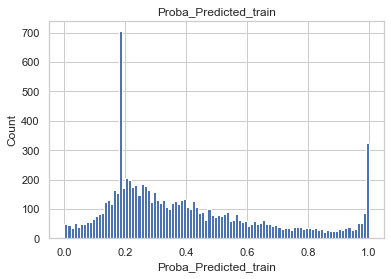

In [76]:
df_test_out['Proba_Predicted_train'].hist(bins = 100)
plt.xlabel("Proba_Predicted_train")
plt.ylabel("Count")
plt.title("Proba_Predicted_train")
plt.savefig("Proba_Predicted_train.png")

In [77]:
# df_test_out[(df_test_out['Proba_Predicted_train']>=0.190)&(df_test_out['Proba_Predicted_train']<=0.195)]['Proba_Predicted_train'].hist(bins = 10)

In [78]:
clients = df_test_out[(df_test_out['Proba_Predicted_train']>=0.190)&(df_test_out['Proba_Predicted_train']<=0.195)]['ClientId'].to_list()

In [79]:
# df[df['ClientId'].isin(clients)].head()

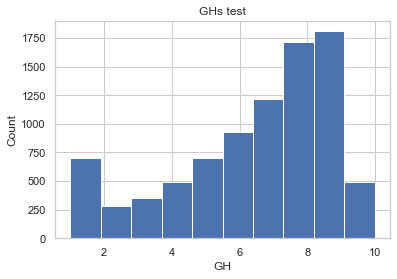

In [80]:
df_test_out['GH'].hist(bins = 10)
plt.xlabel("GH")
plt.ylabel("Count")
plt.title("GHs test")
plt.savefig("GHs.png")

## Save Data

In [81]:
# df_test_out.to_csv('../data/processed/result_test.csv', index = False)

In [82]:
# df_train_score.columns